# Module 6 Assignment: Predictive Model Exercise

## DATA INGESTION

In [30]:
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter("ignore", UserWarning)

In [31]:
churn_data = pd.read_excel('Fitness Club Data V4.xlsx')

churn_data.head(10)

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,20190101,1830.2340,210.0000,6.0,CreditCard,1,0,0,0
1,20190101,1296.6660,1296.6660,6.0,Cash,0,0,0,0
2,20190101,930.4428,105.0000,5.0,Cash,0,0,0,0
3,20190102,798.3696,199.5924,9.0,DirectDebit,0,0,1,0
4,20190103,1206.2400,210.0000,9.0,Cheque,0,0,0,0
5,20190104,1048.3200,126.0000,12.0,Cash,0,0,1,0
6,20190105,209.1600,209.1600,8.0,Cash,0,0,0,0
7,20190105,764.2236,294.0000,13.0,DirectDebit,1,0,0,0
8,20190106,1408.6800,105.0000,10.0,Cash,0,0,0,1
9,20190106,1548.9600,1548.9600,9.0,Cash,7,0,1,0


## Describing the Data

In [32]:
#describe the data
churn_data[['price', 'downpmt', 'age']].describe()

,price,downpmt,age
count,24843.000000,24843.000000,24843.000000
mean,843.073475,167.852609,29.203317
std,368.948806,281.767279,13.277721
min,0.000000,0.000000,0.000000
25%,587.160000,41.160000,22.000000
50%,839.160000,84.000000,28.000000
75%,1049.160000,147.000000,36.000000
max,7871.850000,7871.850000,99.000000


In [6]:
churn_data['enrolldt'].value_counts()

20200831    132
20201231     82
20200331     74
20191231     73
20200731     70
           ... 
20190405      9
20200913      8
20190607      8
20190413      8
20190209      7
Name: enrolldt, Length: 818, dtype: int64

In [7]:
churn_data['pmttype'].value_counts()

Cash           7760
CreditCard     6038
DirectDebit    5899
Cheque         5146
Name: pmttype, dtype: int64

In [8]:
churn_data['use'].value_counts()

0    9919
1    5776
6    2462
3    2385
4    1483
5    1125
7     792
2     618
8     283
Name: use, dtype: int64

In [9]:
churn_data['gender'].value_counts()

1    12471
0    12372
Name: gender, dtype: int64

In [10]:
churn_data['use'].value_counts()

0    9919
1    5776
6    2462
3    2385
4    1483
5    1125
7     792
2     618
8     283
Name: use, dtype: int64

In [11]:
churn_data['default'].value_counts()

0    21985
1     2858
Name: default, dtype: int64

In [12]:
#check any missing value column wise
churn_data.isnull().sum(axis = 0)

enrolldt    0
price       0
downpmt     0
monthdue    0
pmttype     0
use         0
age         0
gender      0
default     0
dtype: int64

In [13]:
churn_data.isnull().sum(axis = 1) #row wise

0        0
1        0
2        0
3        0
4        0
        ..
24838    0
24839    0
24840    0
24841    0
24842    0
Length: 24843, dtype: int64

In [14]:
churn_data.dtypes

enrolldt      int64
price       float64
downpmt     float64
monthdue    float64
pmttype      object
use           int64
age           int64
gender        int64
default       int64
dtype: object

## DATA CLEANING

In [33]:
#Change format of enrollment date to a date format assuming it is captured in YYYYMMDD format
from datetime import datetime

churn_data['enrolldt'] = pd.to_datetime(churn_data['enrolldt'], format = '%Y%m%d')

churn_data['enroll_month'] = pd.DatetimeIndex(churn_data['enrolldt']).month
churn_data['enroll_year'] = pd.DatetimeIndex(churn_data['enrolldt']).year
churn_data.tail(10)

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default,enroll_month,enroll_year
24833,2019-09-06,0.0,0.0,29.0,DirectDebit,1,99,0,0,9,2019
24834,2019-11-06,0.0,0.0,15.0,Cheque,0,99,0,0,11,2019
24835,2019-11-06,0.0,0.0,19.0,CreditCard,0,99,0,0,11,2019
24836,2019-12-06,0.0,0.0,19.0,DirectDebit,0,99,0,0,12,2019
24837,2019-12-06,0.0,0.0,25.0,DirectDebit,3,99,0,0,12,2019
24838,2019-12-06,0.0,0.0,4.0,CreditCard,1,99,0,0,12,2019
24839,2019-12-06,0.0,0.0,10.0,DirectDebit,0,99,0,0,12,2019
24840,2019-12-21,0.0,0.0,10.0,CreditCard,1,99,0,0,12,2019
24841,2020-03-06,0.0,0.0,0.0,Cheque,0,99,1,0,3,2020
24842,2020-06-06,0.0,0.0,9.5,DirectDebit,0,99,0,0,6,2020


# DATA VISUALIZATION

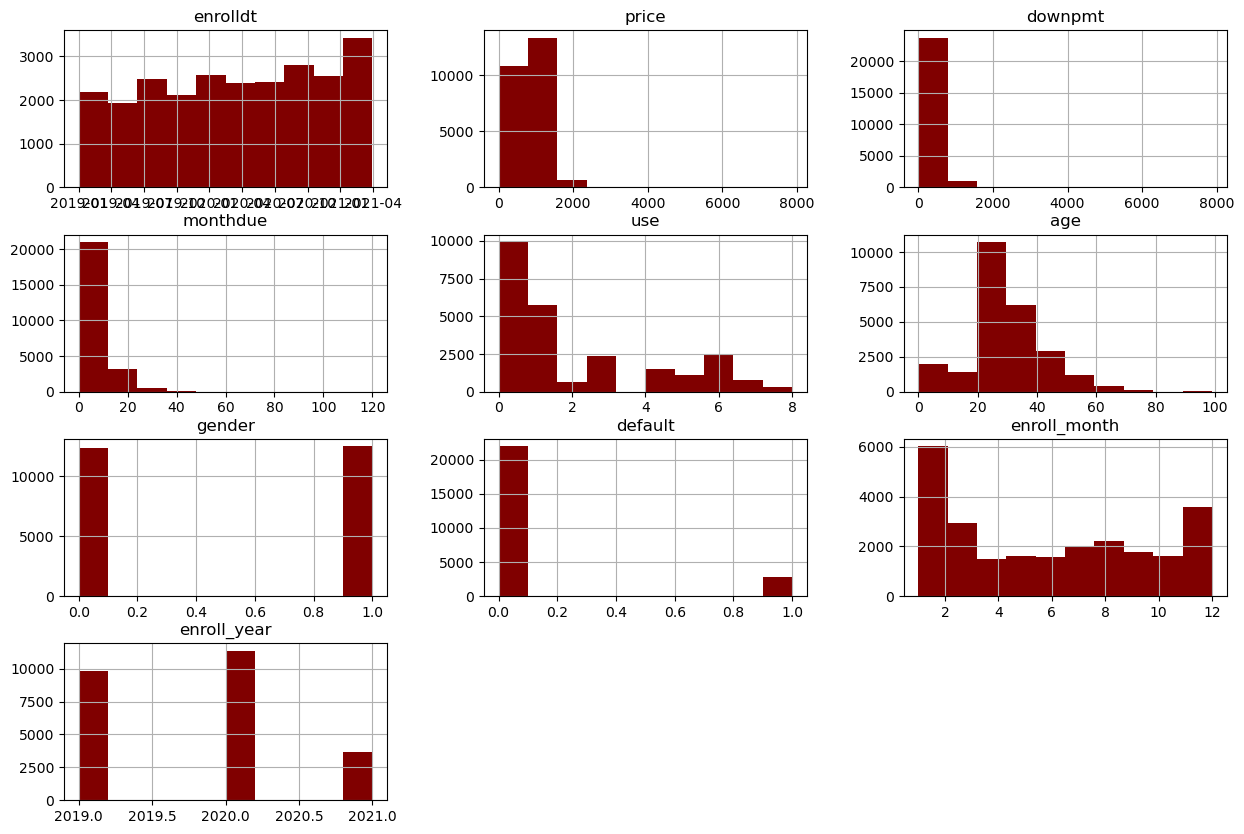

In [20]:
#Visualization
import matplotlib.pyplot as plt
#import seaborn
#import plotly

fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
churn_data.hist(ax = ax, color = 'maroon')

pass #removes the text data

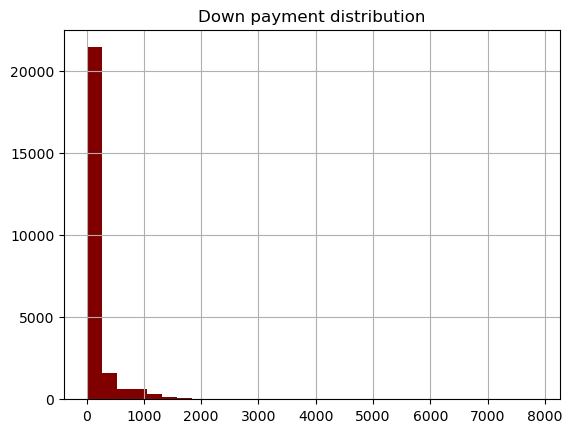

In [21]:
#plot single column
churn_data['downpmt'].hist(color = 'maroon', bins = 30)
plt.title('Down payment distribution')
pass

In [22]:
#check correlation
#select only numerical values
churn_data[['price', 'downpmt', 'age']].corr() #by deafault - pearson

,price,downpmt,age
price,1.000000,0.277764,-0.097624
downpmt,0.277764,1.000000,0.000483
age,-0.097624,0.000483,1.000000


## Data Preprocessing

In [29]:

churn_data = churn_data[churn_data['age'].between(17, 79)]

churn_data.head()

,enrolldt,price,downpmt,monthdue,age,gender,default,enroll_month,enroll_year,pmttype_Cheque,pmttype_CreditCard,pmttype_DirectDebit,use_1,use_2,use_3,use_4,use_5,use_6,use_7,use_8
2241,2019-01-06,1827.0000,336.0000,5.50,17,0,0,1,2019,1,0,0,0,0,0,0,0,0,0,0
2242,2019-01-19,462.8820,385.5852,28.89,17,0,0,1,2019,0,0,0,0,0,0,0,0,1,0,0
2243,2019-01-27,1544.0796,84.0000,5.86,17,0,1,1,2019,0,0,0,0,0,0,0,0,0,0,0
2244,2019-01-30,1827.0000,1827.0000,6.00,17,1,0,1,2019,0,0,0,0,0,0,0,0,0,0,0
2245,2019-02-08,1230.1296,1230.1296,11.00,17,1,0,2,2019,0,0,0,0,0,0,0,0,0,0,0


In [34]:
#Create dummy variables
churn_data = pd.get_dummies(churn_data, columns = ['pmttype', 'use','enroll_month','enroll_year'], drop_first = True, prefix = ['pmttype', 'use','month','year'])

churn_data.head(10)

,enrolldt,price,downpmt,monthdue,age,gender,default,pmttype_Cheque,pmttype_CreditCard,pmttype_DirectDebit,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2020,year_2021
0,2019-01-01,1830.2340,210.0000,6.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-01-01,1296.6660,1296.6660,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01,930.4428,105.0000,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-02,798.3696,199.5924,9.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-03,1206.2400,210.0000,9.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2019-01-04,1048.3200,126.0000,12.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2019-01-05,209.1600,209.1600,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2019-01-05,764.2236,294.0000,13.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,2019-01-06,1408.6800,105.0000,10.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2019-01-06,1548.9600,1548.9600,9.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#churn down payment %

churn_data['downpmt_percent'] = (churn_data['downpmt']/churn_data['price']).round(2)

churn_data.head(10)

,enrolldt,price,downpmt,monthdue,age,gender,default,pmttype_Cheque,pmttype_CreditCard,pmttype_DirectDebit,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2020,year_2021,downpmt_percent
0,2019-01-01,1830.2340,210.0000,6.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.11
1,2019-01-01,1296.6660,1296.6660,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
2,2019-01-01,930.4428,105.0000,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.11
3,2019-01-02,798.3696,199.5924,9.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.25
4,2019-01-03,1206.2400,210.0000,9.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.17
5,2019-01-04,1048.3200,126.0000,12.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.12
6,2019-01-05,209.1600,209.1600,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
7,2019-01-05,764.2236,294.0000,13.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.38
8,2019-01-06,1408.6800,105.0000,10.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.07
9,2019-01-06,1548.9600,1548.9600,9.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00


In [36]:
#Drop the enrollment date column
churn_data = churn_data.drop(['enrolldt'], axis = 1)

In [37]:
churn_data.head(10)

,price,downpmt,monthdue,age,gender,default,pmttype_Cheque,pmttype_CreditCard,pmttype_DirectDebit,use_1,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2020,year_2021,downpmt_percent
0,1830.2340,210.0000,6.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0.11
1,1296.6660,1296.6660,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
2,930.4428,105.0000,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.11
3,798.3696,199.5924,9.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.25
4,1206.2400,210.0000,9.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.17
5,1048.3200,126.0000,12.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.12
6,209.1600,209.1600,8.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
7,764.2236,294.0000,13.0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0.38
8,1408.6800,105.0000,10.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.07
9,1548.9600,1548.9600,9.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00


In [40]:
churn_data.isnull().sum(axis = 0)

price                  0
downpmt                0
monthdue               0
age                    0
gender                 0
default                0
pmttype_Cheque         0
pmttype_CreditCard     0
pmttype_DirectDebit    0
use_1                  0
use_2                  0
use_3                  0
use_4                  0
use_5                  0
use_6                  0
use_7                  0
use_8                  0
month_2                0
month_3                0
month_4                0
month_5                0
month_6                0
month_7                0
month_8                0
month_9                0
month_10               0
month_11               0
month_12               0
year_2020              0
year_2021              0
downpmt_percent        0
dtype: int64

In [39]:
churn_data['downpmt_percent'] = churn_data['downpmt_percent'].fillna(churn_data['downpmt_percent'].mean(), axis = 0)

## Model Building - Logistic Regression

In [66]:
#split data, creating two dataframes - one with all features (X) and another one with just the default variable (y)

y = churn_data['default']
X = churn_data.drop(['default'], axis = 1)

y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [67]:
X.head(5)

,price,downpmt,monthdue,age,gender,pmttype_Cheque,pmttype_CreditCard,pmttype_DirectDebit,use_1,use_2,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2020,year_2021,downpmt_percent
0,1830.2340,210.0000,6.0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0.11
1,1296.6660,1296.6660,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
2,930.4428,105.0000,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.11
3,798.3696,199.5924,9.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.25
4,1206.2400,210.0000,9.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.17


In [68]:
#Splitting data into training and testing sets
#0.8 for training and 0.2 for testing one

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [69]:
#Create a model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#Fit the model with data
logreg.fit(X_train, y_train)

#Predict
y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
logreg.predict_proba(X_test)

array([[0.98108876, 0.01891124],
       [0.99553134, 0.00446866],
       [0.74285659, 0.25714341],
       ...,
       [0.63127743, 0.36872257],
       [0.66925959, 0.33074041],
       [0.99744461, 0.00255539]])

In [71]:
#Confusion matrix - new section

y_test

9068     0
192      0
4901     0
21845    0
14076    0
        ..
10226    0
22621    0
18614    0
13641    1
17402    0
Name: default, Length: 4969, dtype: int64

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("The Confusion Matrix is \n \n ", confusion_matrix(y_test, y_pred))

The Confusion Matrix is 
 
  [[4263  134]
 [ 346  226]]


In [73]:
print("The Classification table is \n \n ", classification_report(y_test, y_pred))

The Classification table is 
 
                precision    recall  f1-score   support

           0       0.92      0.97      0.95      4397
           1       0.63      0.40      0.48       572

    accuracy                           0.90      4969
   macro avg       0.78      0.68      0.72      4969
weighted avg       0.89      0.90      0.89      4969



In [77]:
#Create a ROC curve
from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[::, 1])

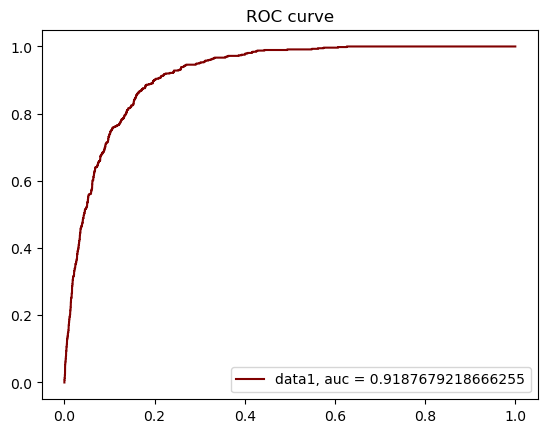

In [78]:
auc = metrics.roc_auc_score(y_test, y_pred_proba[::, 1])
plt.plot(fpr, tpr, label = "data1, auc = "+str(auc), color = 'maroon')
plt.legend(loc = 4)
plt.title('ROC curve')
plt.show()

In [63]:
#Gains chart -  New section

In [79]:
#Features selection - New section

#Getting the best coefficients
feature_imp = logreg.coef_
coef_table = pd.DataFrame({'features_names': X_train.columns, "Beta": feature_imp[0], "AbsBeta": abs(feature_imp[0])})
#Get sorted values
coef_table = coef_table.sort_values(by = 'AbsBeta', ascending = False)
print("The most important features in the model are: \n")
coef_table

The most important features in the model are: 



,features_names,Beta,AbsBeta
6,pmttype_CreditCard,-4.289538,4.289538
7,pmttype_DirectDebit,-3.039998,3.039998
28,year_2021,-1.910607,1.910607
13,use_6,-1.827991,1.827991
10,use_3,-1.418120,1.418120
11,use_4,-1.147995,1.147995
12,use_5,-0.965582,0.965582
5,pmttype_Cheque,-0.936211,0.936211
14,use_7,-0.678993,0.678993
17,month_3,-0.452707,0.452707


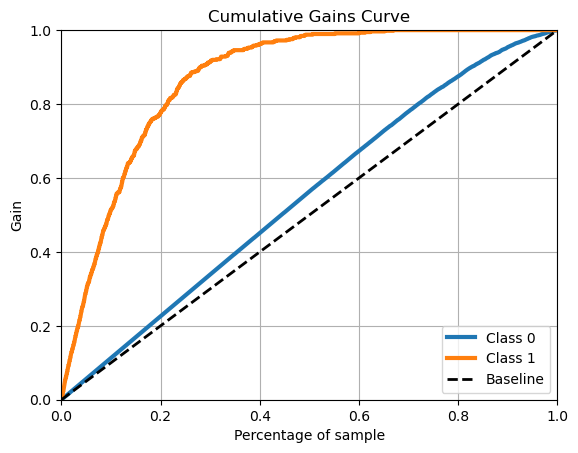

In [80]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test,y_pred_proba)
plt.show()